In [7]:
# %%
# Cell 1: Imports and setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Visualization settings
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [12]:
# %%
# Cell 2: Load and verify data
try:
    df = pd.read_csv('../data/owid-covid-data.csv')
    print(f"✅ Data loaded successfully! Shape: {df.shape}")
    print("Columns:", df.columns.tolist())
except FileNotFoundError:
    print("❌ Error: File not found at '../data/owid-covid-data.csv'")

✅ Data loaded successfully! Shape: (429435, 67)
Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per

In [13]:
# %%
# Cell 3: Data cleaning
# Select relevant columns and convert dates
df = df[['date', 'location', 'total_cases', 'total_deaths', 'people_vaccinated', 'people_vaccinated_per_hundred']]
df['date'] = pd.to_datetime(df['date'])

# Filter for specific countries
countries = ['United States', 'India', 'Brazil', 'Germany', 'Kenya']
df_filtered = df[df['location'].isin(countries)].copy()

# Calculate derived metrics
df_filtered['new_cases'] = df_filtered.groupby('location')['total_cases'].diff()
df_filtered['death_rate'] = (df_filtered['total_deaths'] / df_filtered['total_cases']) * 100

# Show cleaned data
print("Cleaned data sample:")
df_filtered.tail()

Cleaned data sample:


,date,location,total_cases,total_deaths,people_vaccinated,people_vaccinated_per_hundred,new_cases,death_rate
405120,2024-07-31,United States,103436829.0,1192546.0,NaN,NaN,0.0,1.152922
405121,2024-08-01,United States,103436829.0,1192546.0,NaN,NaN,0.0,1.152922
405122,2024-08-02,United States,103436829.0,1192546.0,NaN,NaN,0.0,1.152922
405123,2024-08-03,United States,103436829.0,1192546.0,NaN,NaN,0.0,1.152922
405124,2024-08-04,United States,103436829.0,1193165.0,NaN,NaN,0.0,1.153520


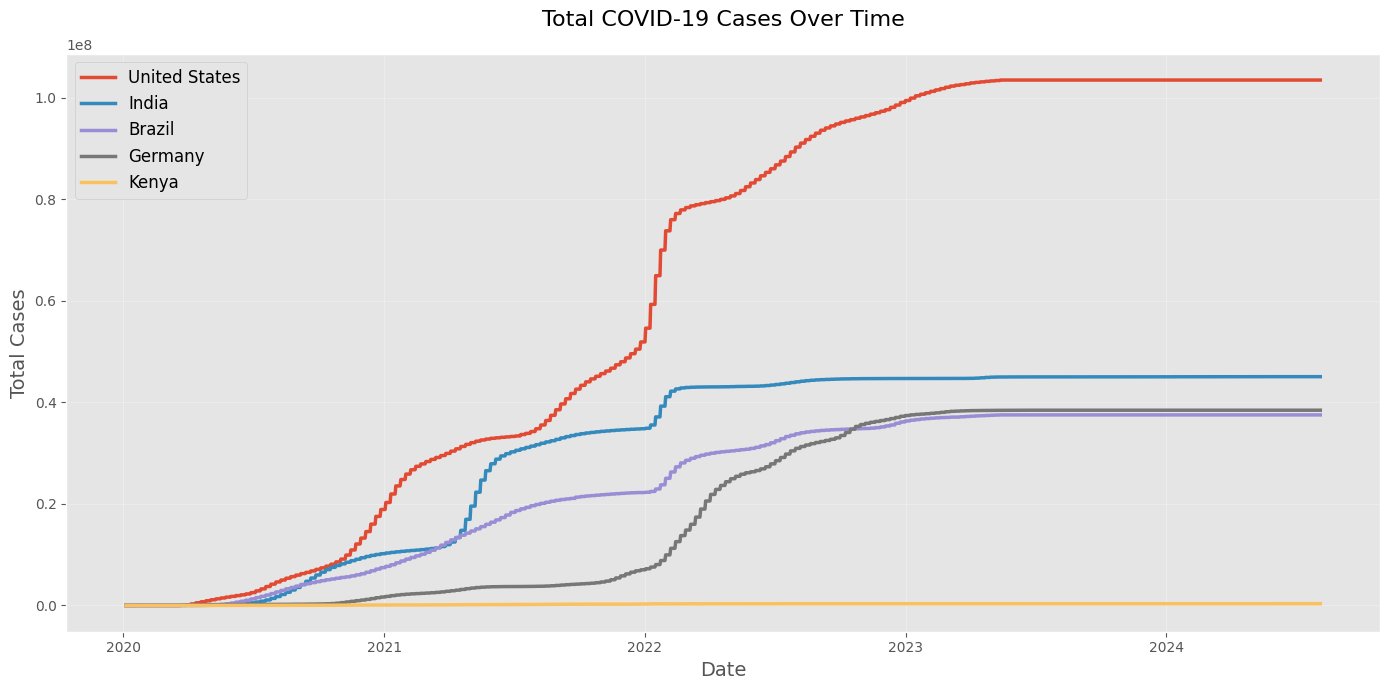

In [14]:
# %%
# Cell 4: Cases over time visualization
plt.figure(figsize=(14, 7))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country, linewidth=2.5)

plt.title('Total COVID-19 Cases Over Time', fontsize=16, pad=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.legend(fontsize=12, framealpha=1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

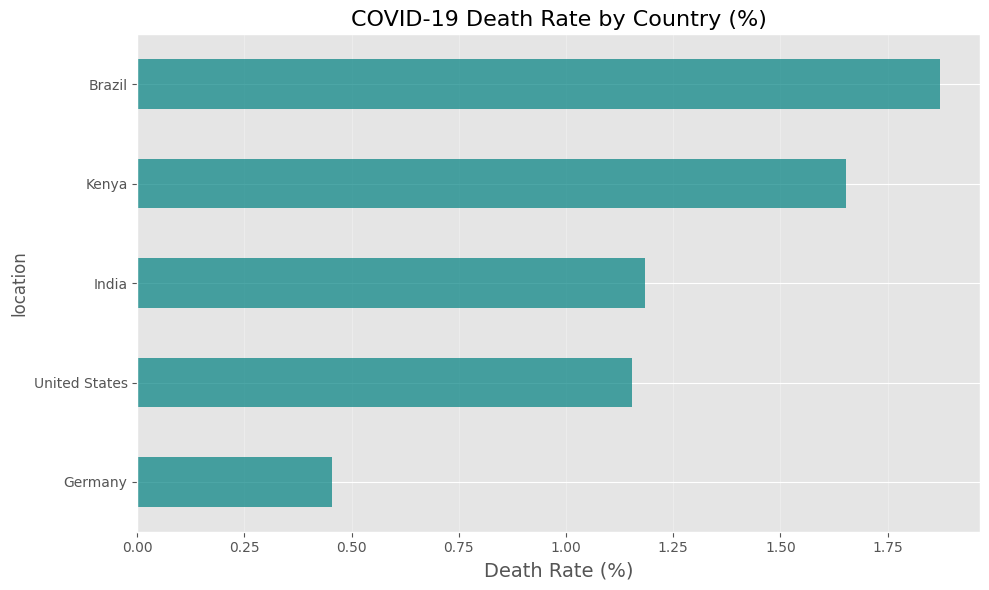

In [15]:
# %%
# Cell 5: Death rate analysis
death_rates = df_filtered.groupby('location')['total_deaths'].max() / \
             df_filtered.groupby('location')['total_cases'].max() * 100

plt.figure(figsize=(10, 6))
death_rates.sort_values().plot(kind='barh', color='teal', alpha=0.7)
plt.title('COVID-19 Death Rate by Country (%)', fontsize=16)
plt.xlabel('Death Rate (%)', fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

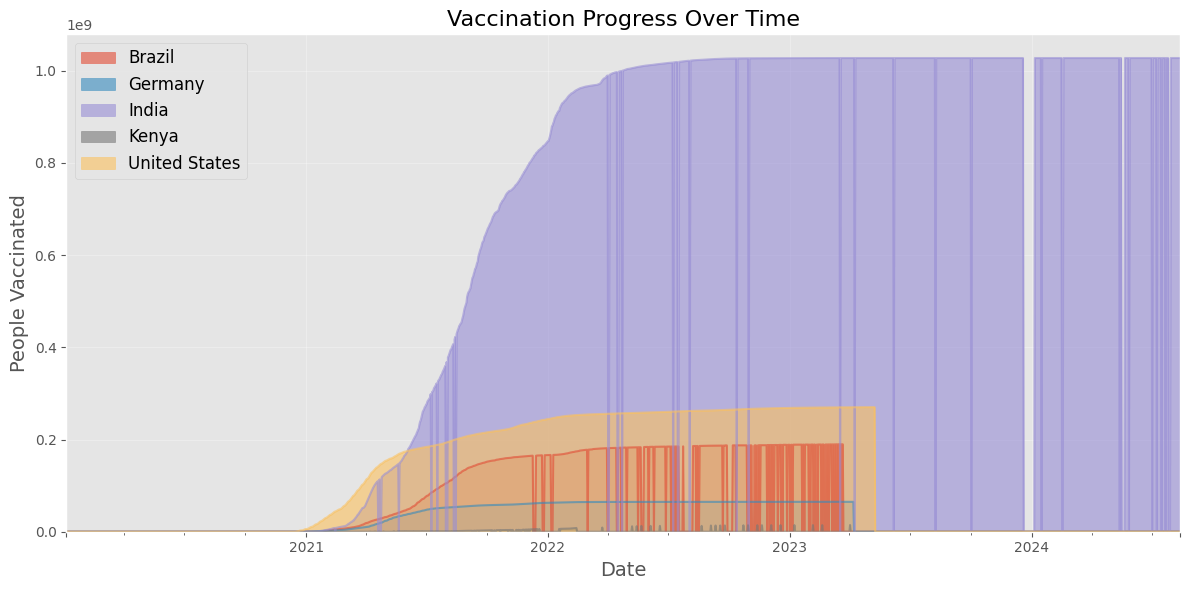

In [16]:
# %%
# Cell 6: Vaccination progress
plt.figure(figsize=(14, 7))
vaccine_pivot = df_filtered.pivot(index='date', columns='location', values='people_vaccinated')
vaccine_pivot.plot.area(alpha=0.6, stacked=False)

plt.title('Vaccination Progress Over Time', fontsize=16)
plt.ylabel('People Vaccinated', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
# %%
# Cell 7: Interactive visualization with Plotly
fig = px.line(df_filtered, 
             x='date', 
             y='total_cases', 
             color='location',
             title='<b>Interactive COVID-19 Cases Comparison</b>',
             labels={'total_cases': 'Total Cases', 'date': 'Date'},
             template='plotly_white')

fig.update_layout(font=dict(size=12),
                 hovermode='x unified')
fig.show()

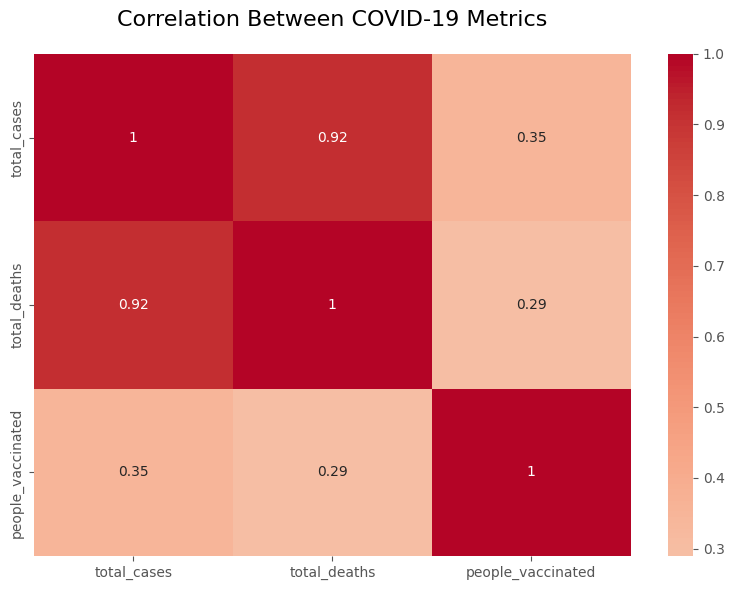

In [18]:
# %%
# Cell 8: Correlation analysis
plt.figure(figsize=(8, 6))
corr_data = df_filtered[['total_cases', 'total_deaths', 'people_vaccinated']].corr()
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between COVID-19 Metrics', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


In [19]:
# %%
# Cell 9: Summary statistics
summary = df_filtered.groupby('location').agg({
    'total_cases': 'max',
    'total_deaths': 'max',
    'people_vaccinated': 'max',
    'death_rate': 'mean'
}).sort_values('total_cases', ascending=False)

print("Key Statistics:")
summary.style.background_gradient(cmap='Blues')

Key Statistics:


,total_cases,total_deaths,people_vaccinated,death_rate
location,,,,
United States,103436829.000000,1193165.000000,270227181.000000,1.689342
India,45041748.000000,533623.000000,1027438924.000000,1.368525
Germany,38437756.000000,174979.000000,64876299.000000,7.383355
Brazil,37511921.000000,702116.000000,189643431.000000,2.451572
Kenya,344106.000000,5689.000000,14494372.000000,1.887580


In [20]:
# %%
# Cell 10: Export results
import os

# Create directories if they don't exist
os.makedirs('visualizations', exist_ok=True)
os.makedirs('processed_data', exist_ok=True)

# Save visualizations
plt.savefig('visualizations/total_cases.png', dpi=300)
plt.savefig('visualizations/death_rates.png', dpi=300)
plt.savefig('visualizations/vaccinations.png', dpi=300)
# Save processed data
df_filtered.to_csv('processed_data/cleaned_covid_data.csv', index=False)

print("✅ Analysis complete! Files saved to /visualizations and /processed_data")

✅ Analysis complete! Files saved to /visualizations and /processed_data


<Figure size 1200x600 with 0 Axes>